# fastlife: Present Value of Net Cashflows

This notebook calculates the present value of cash flows of life insurance policies by age and gender, for three different types, term life, whole life and endowment products. It then outputs graphs plotting the present values.

Click the badge below to run this notebook online on Google Colab. You need a Google account and need to be logged in to it to run this notebook on Google Colab.
[![Run on Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lifelib-dev/lifelib/blob/current/lifelib/projects/fastlife/fastlife-pvnetcfs.ipynb)


The next code cell below is relevant only when you run this notebook on Google Colab. It installs lifelib and creates a copy of the library for this notebook.

In [1]:
import sys, os

if 'google.colab' in sys.modules:
    lib = 'fastlife'; lib_dir = '/content/'+ lib
    if not os.path.exists(lib_dir):
        !pip install lifelib
        import lifelib; lifelib.create(lib, lib_dir)
        
    %cd $lib_dir

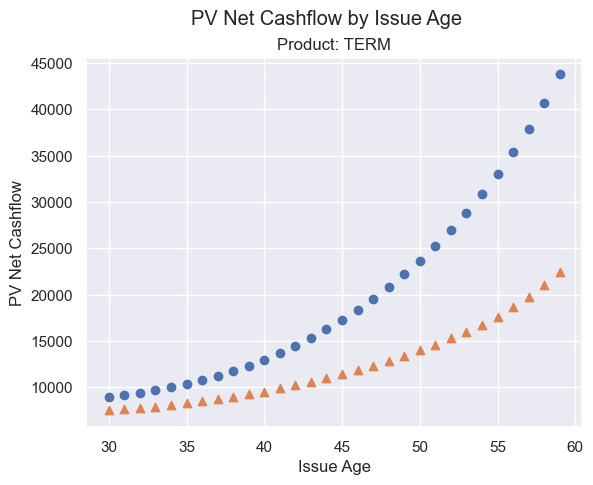

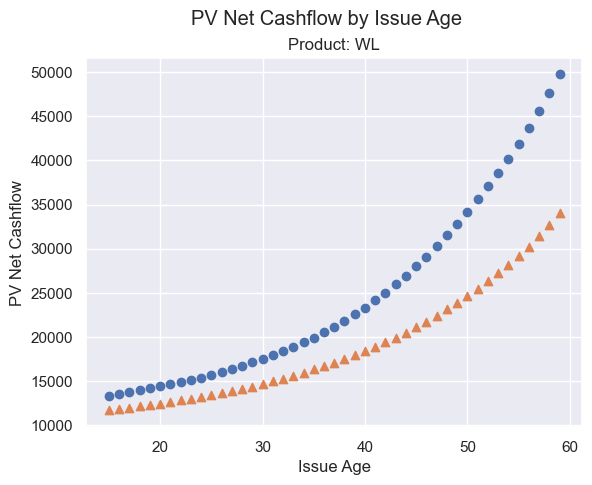

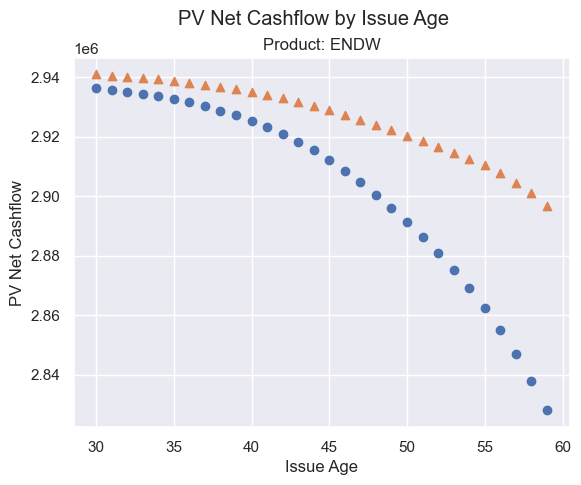

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import modelx as mx

proj = mx.read_model("model").Projection
pols = proj.Policy.PolicyData()


for prod in ["TERM", "WL", "ENDW"]:

    fig, ax = plt.subplots()
    fig.suptitle('PV Net Cashflow by Issue Age')
    ax.set_title('Product: ' + prod)
    title = 'Product: ' + prod
    ax.set_xlabel('Issue Age')
    ax.set_ylabel('PV Net Cashflow')

    for sex, marker in zip(["M", "F"], ["o", "^"]):
        filter = (pols.Product == prod) & (
                pols.Sex == sex) & (pols.IssueAge < 60)
        ages = proj.Policy.IssueAge().loc[filter]
        pvcfs = proj.PV_NetCashflow(0).loc[filter]
        ax.scatter(ages, pvcfs, marker=marker)
